# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Inas Hamidah
- **Email:** inashmdh@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Season berapa yang mengalami peminjaman sepeda dengan jumlah sewa tertinggi dan terendah?
- Bagaimana korelasi antara suhu dan jumlah pengguna yang terdaftar?
- Bagaimana korelasi antara cuaca dan jumlah pengguna?

## Import Semua Packages/Library yang Digunakan

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [111]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [112]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [113]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [114]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [115]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [116]:
print("Jumlah duplikasi DataFrame day: ", day_df.duplicated().sum())

Jumlah duplikasi DataFrame day:  0


In [117]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [118]:
print("Jumlah duplikasi DataFrame hour: ", hour_df.duplicated().sum())

Jumlah duplikasi DataFrame hour:  0


In [119]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [120]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [121]:
day_df['dteday'] = pd.to_datetime(day_df["dteday"])
hour_df['dteday'] = pd.to_datetime(day_df["dteday"])

In [122]:
print('day_df["dteday"] : ', day_df["dteday"].dtypes)
print('hour_df["dteday"] : ', hour_df["dteday"].dtypes)

day_df["dteday"] :  datetime64[ns]
hour_df["dteday"] :  datetime64[ns]


Pada data day_df dan hour_df tidak mengalami:
*   Missing value,
*   Duplikasi data.

Maka data day_df dan hour_df sudah lengkap dan dapat digunakan ke langkah selanjutnya: Exploratory Data Analysis (EDA)



## Exploratory Data Analysis (EDA)

### Explore ...

In [123]:
# Rangkuman parameter statistik dari data day_df
day_df.describe(include='all')

<ipython-input-123-7177c0789e50>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include='all')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [124]:
# Pengecekkan penyewa: casual, registered, dan cnt berdasarkan seasonnya pada day_df
day_df.groupby(by=['season'], observed=True).agg({
    'casual': ['mean'],
    'registered': ['mean'],
    'cnt': ['max','min','mean']
})

casual   registered   cnt                   
               mean         mean   max   min         mean
season                                                   
1        334.928177  2269.204420  7836   431  2604.132597
2       1106.097826  3886.233696  8362   795  4992.331522
3       1202.611702  4441.691489  8714  1115  5644.303191
4        729.112360  3999.050562  8555    22  4728.162921

In [125]:
# # Pengecekkan penyewa: casual, registered, dan cnt berdasarkan seasonnya pada hour_df
hour_df.groupby(by=['season'], observed=True).agg({
    'casual': ['mean'],
    'registered': ['mean'],
    'cnt': ['max','min','mean']
})

casual  registered  cnt                
             mean        mean  max min        mean
season                                            
1       14.290901   96.823668  801   1  111.114569
2       46.160581  162.183488  957   1  208.344069
3       50.287144  185.729093  977   1  236.016237
4       30.666824  168.202032  967   1  198.868856

<ipython-input-126-cd1671ef7900>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = day_df.corr()


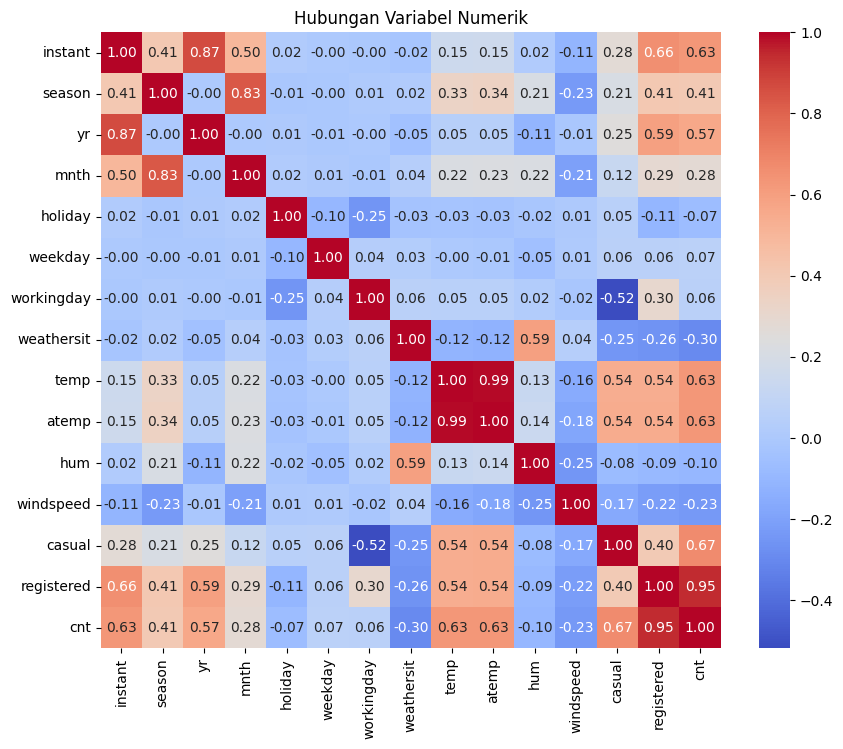

In [126]:
# Membuat matriks Hubungan dari DataFrame day_df
correlation_matrix = day_df.corr()

# Membuat plot heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Membuat judul
plt.title("Hubungan Variabel Numerik")

# Menampilkan plot
plt.show()

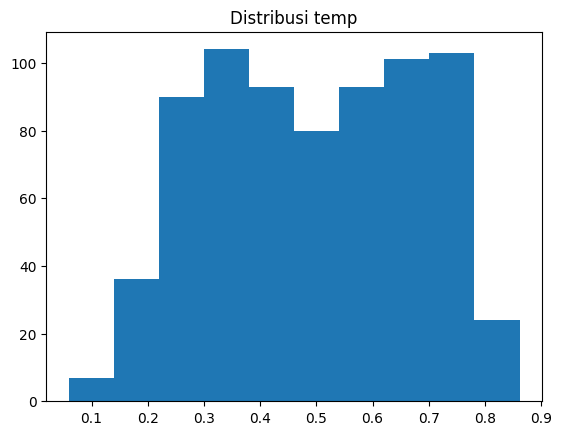

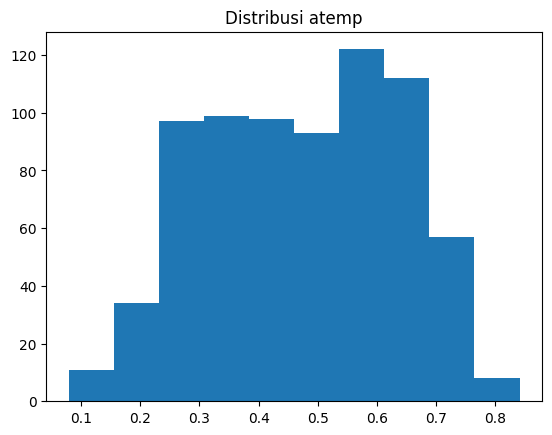

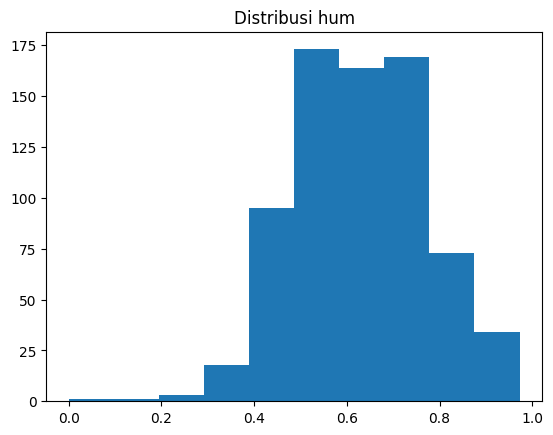

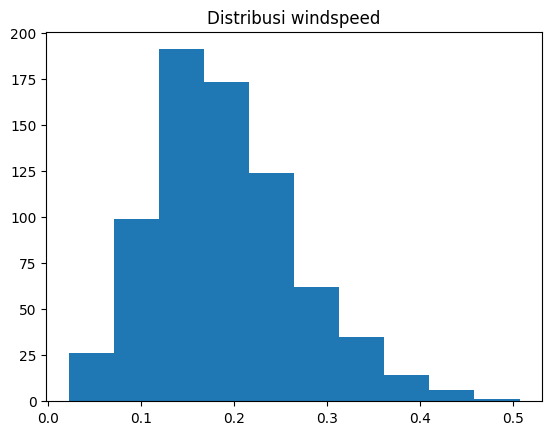

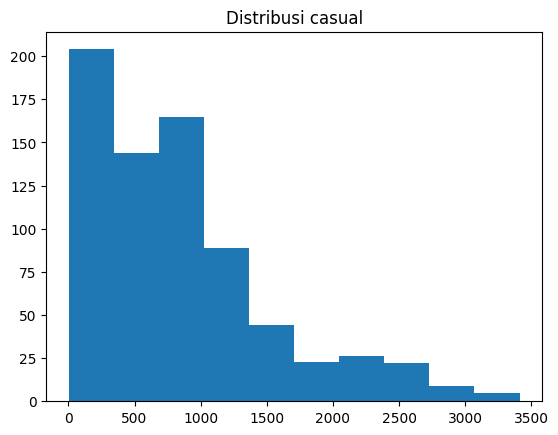

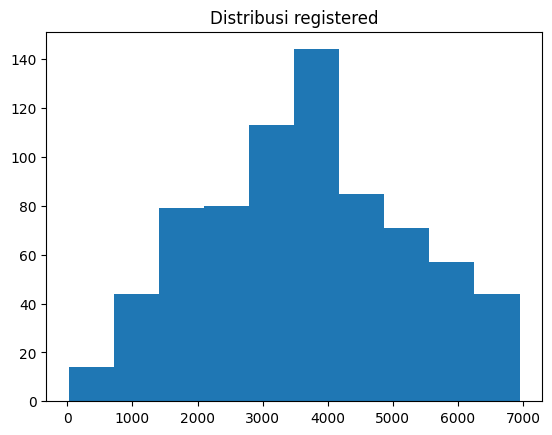

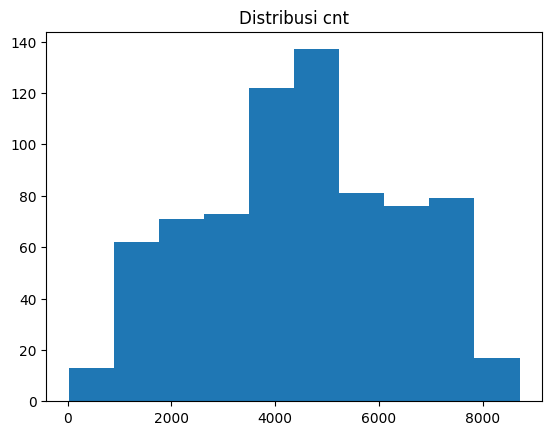

In [127]:
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in numeric_cols:
    # Membuat histogram untuk setiap variabel numerik
    plt.hist(day_df[col])

    # Membuat judul
    plt.title(f'Distribusi {col}')

    # Menampilkan histogram
    plt.show()

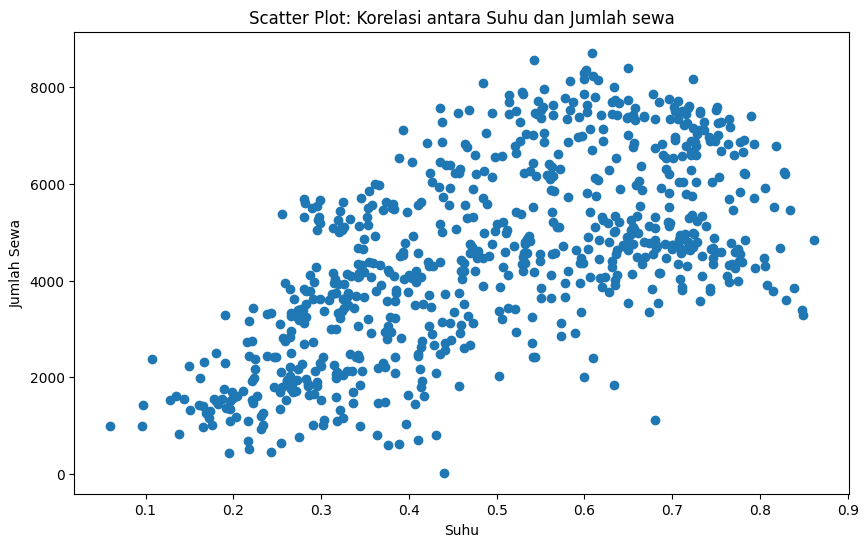

In [128]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(day_df['temp'], day_df['cnt'])

# Membuat judul dan label
plt.title('Scatter Plot: Korelasi antara Suhu dan Jumlah sewa')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Sewa')

# Menampilkan scatter plot
plt.show()

<ipython-input-129-33db8fe46752>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x='weathersit', y='cnt', data=day_df, palette=custom_palette)


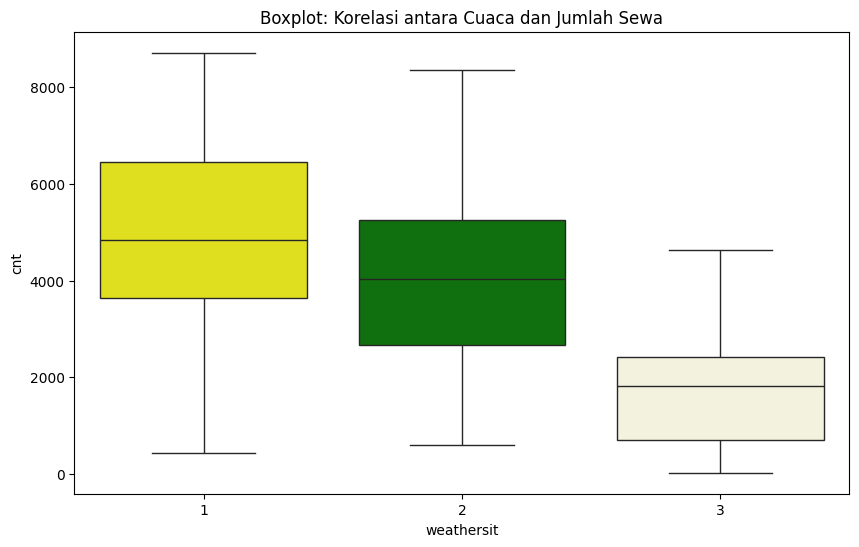

In [129]:
# Menetapkan ukuran gambar
plt.figure(figsize=(10, 6))

# Menentukan palet warna sesuai dengan warna yang diinginkan
custom_palette = ["yellow", "green", "beige"]

# Membuat box plot menggunakan seaborn dengan palet warna khusus
sn.boxplot(x='weathersit', y='cnt', data=day_df, palette=custom_palette)

# Menambahkan judul
plt.title('Boxplot: Korelasi antara Cuaca dan Jumlah Sewa')

# Menampilkan plot
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1: Season berapa yang mengalami peminjaman sepeda dengan jumlah sewa tertinggi dan terendah?

In [130]:
bike_byseason_df = day_df.groupby(by="season", observed=True).instant.nunique().reset_index()
bike_byseason_df.rename(columns={
    "instant": "count"
}, inplace=True)
bike_byseason_df.head()

,season,count
0,1,181
1,2,184
2,3,188
3,4,178


<ipython-input-131-b96ab91802ef>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(


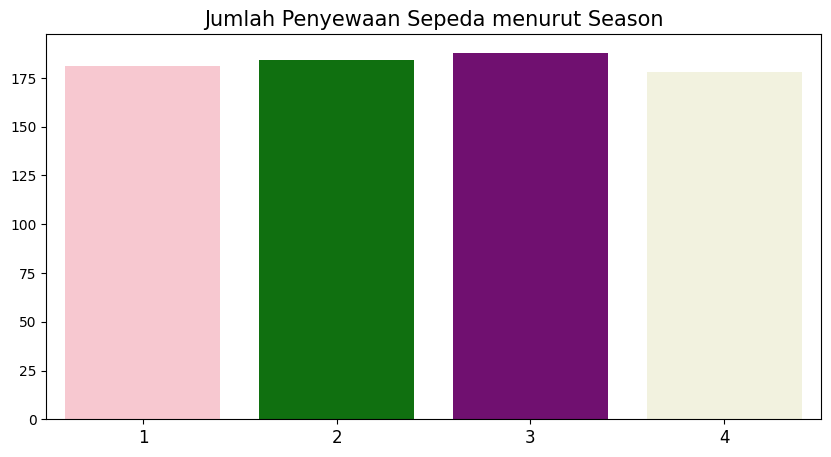

In [131]:
# Menetapkan ukuran gambar
plt.figure(figsize=(10, 5))

# Menentukan palet warna sesuai dengan warna yang diinginkan
custom_palette = ["pink", "green", "purple", "beige"]

# Membuat bar plot menggunakan seaborn dengan palet warna khusus
sn.barplot(
    y="count",
    x="season",
    data=bike_byseason_df.sort_values(by="season", ascending=False),
    palette=custom_palette
)

# Menambahkan judul dan mengatur tata letak
plt.title("Jumlah Penyewaan Sepeda menurut Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)

# Menampilkan plot
plt.show()


**Hasil dari barplot di atas:**

*   Season ke - 3 yang mengalami peminjaman sepeda dengan jumlah sewa tertinggi,
*   Season ke - 4 yang mengalami peminjaman sepeda dengan jumlah sewa terendah.


### Pertanyaan 2: Bagaimana korelasi antara suhu dan jumlah pengguna?




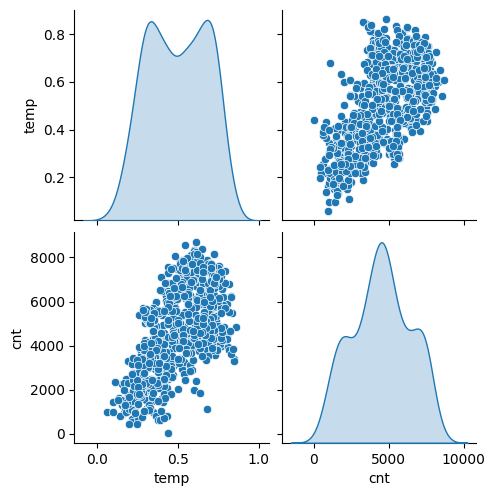

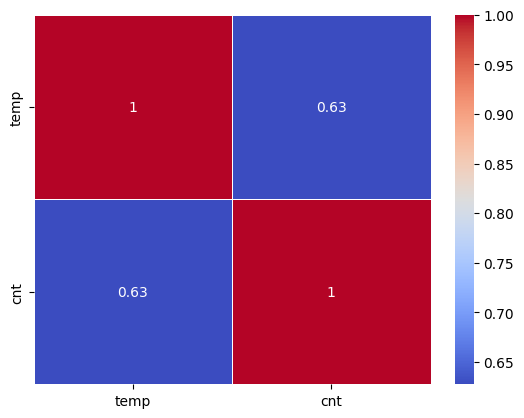

In [132]:
# Membuat scatter plot dengan matplotlib
sn.pairplot(day_df[['temp', 'cnt']], diag_kind='kde')
plt.show()

sn.heatmap(day_df[['temp', 'cnt']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

Visualisasi scatter plot menyatakan bahwa Korelasi antara suhu dan jumlah penyewa sepeda adalah positif.

###3. Bagaimana korelasi antara cuaca dan jumlah pengguna?

<ipython-input-133-33db8fe46752>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x='weathersit', y='cnt', data=day_df, palette=custom_palette)


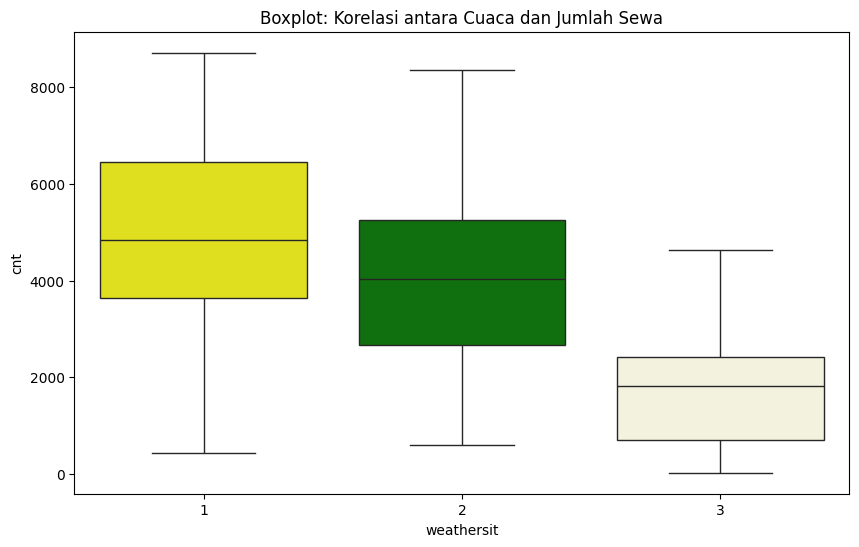

In [133]:
# Menetapkan ukuran gambar
plt.figure(figsize=(10, 6))

# Menentukan palet warna sesuai dengan warna yang diinginkan
custom_palette = ["yellow", "green", "beige"]

# Membuat box plot menggunakan seaborn dengan palet warna khusus
sn.boxplot(x='weathersit', y='cnt', data=day_df, palette=custom_palette)

# Menambahkan judul
plt.title('Boxplot: Korelasi antara Cuaca dan Jumlah Sewa')

# Menampilkan plot
plt.show()


**Dari hasil viasualisasi boxpot di atas:**
Pada musim ke-1 memiliki rata-rata sewa terbanyak/tertinggi dibandingkan musim ke-2 dan ke-3.

## Conclusion

* **Conclution pertanyaan 1:** Berdasarkan hasil pengamatan, penyewaan sepeda paling banyak dipinjamkan pada  season ke - 3, urutan season yang memiliki jumlah penyewaan sepeda tertinggi ke paling rendah:
 1. Season ke - 3
 2. Season ke - 2
 3. Season ke - 1
 4. Season ke - 4


- **Conclution pertanyaan 2:** Korelasi antara suhu dan jumlah penyewa sepeda adalah positif. Ini berarti bahwa ketika suhu meningkat, jumlah minat penyewa sepeda juga meningkat. Hal ini dapat dilihat pada grafik, di mana terdapat garis tren positif yang menghubungkan kedua variabel.

- **Conclution pertanyaan 3:** Faktor cuaca juga merupakan faktor yang sangat mempengaruhi dan signifikan terhadap jumlah minat penyewa sepeda.
Urutan cuaca yang memiliki rata-rata tertinggi ke paling rendah:
 1. Cuaca 1
 2. Cuaca 2
 3. Cuaca 3

In [135]:
day_df.to_csv("all_data.csv", index=False)